In [ ]:
import random
import secrets
from tqdm import tqdm
import time

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
Project 3

construir anel posições dos anéis (coordenadas polares de raio fixo) 
loop para interconectar os vizinhos (parâmetro) ligar ao primeiro e segundos 
vizinhos mais próximos Watts-Strogatz? dado p, refazer conexões
para o projeto, fazer a rede reticulada.
Gráfico desejado: caminho mais curto = f(p)

'''

def regular_ring(n):
    '''
    Defines a network with a ring format having two properties:
     - each node is connected to its nearest neighbours
     - each node is connected to its second-nearest neighbours     
    '''
    
    G = nx.Graph()
    for i in range(n+1):
        if i+1 <= n:
            G.add_edge(i, i+1)
        else:
            G.add_edge(i, 0)
            
    nodes = list(G.nodes())
    for i in range (0, len(nodes)):
        if i+2 < len(nodes):
            G.add_edge(i, i+2)
        else: 
            G.add_edge(i, i+2 - len(nodes))     
    return G

def reconnect_ring(G, p):
    '''
    Given a regular ring generated by regular_ring function, for each edge of the network, a random event 
    with probability p'< given p removes the edge and adds a new one, mantaining the node degree. 
    '''
    
    nodes = list(G.nodes())    
    for node in nodes:
        edges_node = list(G.edges(node))
        for edge in edges_node:
            if random.random() < p:
                random_node = secrets.choice(nodes)
                new_edge = (node, random_node)
                # Remove selected edge. Add new edge      
                G.remove_edge(list(edge)[0], list(edge)[-1])
                G.add_edge(node, random_node)           
                
def get_avg_shortest_path(G):
    '''
    Given a regular ring generated by regular_ring function, this function loops all of the nodes and 
    creates a dictionary of paths lengths for every other node in the network. It returns the average path lenght 
    for the network.
    Disclaimer: this function uses shortest_path_length build in function from NetworkX library.
    '''
    dict_shortest_paths = nx.shortest_path_length(G)
    node_path_avg = []
    for node, paths in dict_shortest_paths:
        node_path_avg.append(sum(paths.values())/len(G.nodes()))
    
    return sum(node_path_avg)/len(node_path_avg)

def test_avg_shortest_path(n, p, sample=1):

    pbar = tqdm(total=n*sample)
    avg_sp = []
    for s in range(sample):
        G = regular_ring(n)
        reconnect_ring(G, p)
        avg_sp.append(get_avg_shortest_path(G))
        pbar.update(n)
    
    pbar.close()
    return sum(avg_sp)/len(avg_sp)

def plot_avg_shortest_path(n, sample, filename=None):
    
    p = [x for x in range(0, 100, 10)]
    SP = [test_avg_shortest_path(n, x, sample) for x in p]  
    
    fig, ax = plt.subplots()
    ax.plot(p, SP,'k--', label='Num. of nodes {}'.format(n))
    legend = ax.legend(loc='upper right')
    plt.xlabel('Reconnect probability')
    plt.ylabel("Average shortest path")
    if filename != None:
        plt.savefig(filename)
    plt.show()
    print(SP)
    

100%|██████████| 250000/250000 [35:44<00:00, 116.58it/s]


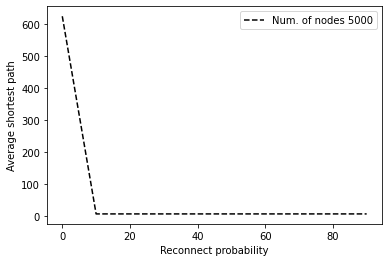

In [ ]:
n = 5000
sample = 50

plot_avg_shortest_path(n, sample)

100%|██████████| 5000/5000 [00:40<00:00, 123.86it/s]


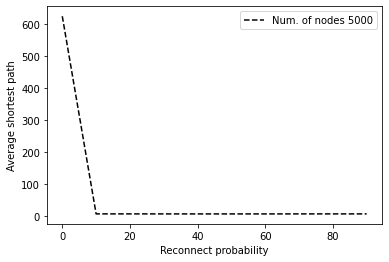

[625.3749250150212, 6.178128101634204, 6.175814627116583, 6.132267407746225, 6.109752974420132, 6.094667489217618, 6.107626545076907, 6.153066927106503, 6.148089558253107, 6.160745375420017]


In [ ]:
n = 5000
sample = 1

plot_avg_shortest_path(n, sample)